Import data, merge data

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/train.csv', na_values='?')
test = pd.read_csv('data/test.csv', na_values='?')
bids = pd.read_csv('data/bids.csv', na_values='?')
sampleSubmission = pd.read_csv('data/sampleSubmission.csv', na_values='?')

#bids.head()
df_merge = pd.merge(train, bids, how='inner', on=['bidder_id'])
df_train = pd.concat([df_merge, pd.get_dummies(df_merge['merchandise'], prefix='cat')], axis=1)
df_train.head()

df_train = df_train.rename(columns=lambda x: x.replace(" ", "_"))


In [32]:
df_merge_test = pd.merge(train, bids, how='inner', on=['bidder_id'])
df_test = pd.concat([df_merge_test, pd.get_dummies(df_merge['merchandise'], prefix='cat')], axis=1)
df_test.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,...,cat_auto parts,cat_books and music,cat_clothing,cat_computers,cat_furniture,cat_home goods,cat_jewelry,cat_mobile,cat_office equipment,cat_sporting goods
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,85371,yitr4,home goods,phone35,9759489368421052,ke,...,0,0,0,0,0,1,0,0,0,0
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,274487,btpyy,home goods,phone1004,9760248684210526,zm,...,0,0,0,0,0,1,0,0,0,0
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,527436,kj2ko,home goods,phone4,9762260578947368,ke,...,0,0,0,0,0,1,0,0,0,0
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,554135,1m5t8,home goods,phone4,9762430736842105,ke,...,0,0,0,0,0,1,0,0,0,0
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,607628,btpyy,home goods,phone4,9762789000000000,ke,...,0,0,0,0,0,1,0,0,0,0


Decision Tree

In [12]:
# select the merchandise type as featulre columns 

X = df_train[['cat_auto_parts', 'cat_books_and_music', 'cat_clothing', 'cat_computers', 'cat_furniture', 'cat_home_goods', 'cat_jewelry', 'cat_mobile', 'cat_office_equipment', 'cat_sporting_goods']]
y = df_train.outcome

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# import class, instantiate estimator, fit with training set
from sklearn.tree import DecisionTreeClassifier
treecls = DecisionTreeClassifier(random_state=1)
treecls.fit(X_train, y_train)

# make predictions
preds = treecls.predict(X_test)

# print predictions and actual values
print preds
print y_test

# print RMSE
from sklearn import metrics
import numpy as np
print np.sqrt(metrics.mean_squared_error(y_test, preds))

pred3 = treecls.predict_proba(X_test)
zip(treecls.classes_, pred3[0])

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
0.364587715382


[(0.0, 0.93739462790849482), (1.0, 0.062605372091505185)]

Best score: 0.365584997525
Best depth: 3


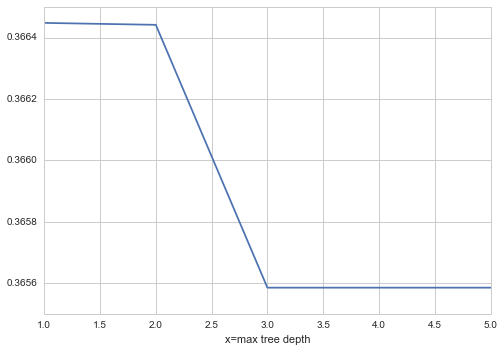

In [23]:
% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

all_scores = []
best_score = -1
best_depth = 0
for i in range(1, 6):
    treecls = DecisionTreeClassifier(max_depth=i, random_state=1)
    scores = cross_val_score(treecls, X, y, cv=3, scoring='mean_squared_error')
    current_score = np.mean(np.sqrt(-scores))
    # If the score mean is better than the current best, or best is the default (-1), then update!
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i
    # store to plot anyway!
    all_scores.append(current_score)
    
print "Best score: %s" % best_score
print "Best depth: %s" % best_depth

# now actually fit the model
treecls = DecisionTreeClassifier(max_depth=best_depth, random_state=1)
treecls.fit(X, y)

plt.figure()
plt.plot(range(1, 6), all_scores)
plt.xlabel('x=max tree depth')

pred3 = treecls.predict_proba(X_test)
zip(treecls.classes_, pred3[0])

In [29]:
feature_cols = ['cat_auto_parts', 'cat_books_and_music', 'cat_clothing', 'cat_computers', 'cat_furniture', 'cat_home_goods', 'cat_jewelry', 'cat_mobile', 'cat_office_equipment', 'cat_sporting_goods']



# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treecls.feature_importances_})

,feature,importance
0,cat_auto_parts,0.000000
1,cat_books_and_music,0.000000
2,cat_clothing,0.000000
3,cat_computers,0.283243
4,cat_furniture,0.000000
5,cat_home_goods,0.000000
6,cat_jewelry,0.000000
7,cat_mobile,0.308692
8,cat_office_equipment,0.000000
9,cat_sporting_goods,0.408066


In [31]:
# create a Graphviz file
from sklearn.tree import export_graphviz
with open("merchandise_cat.dot", 'wb') as f:
    f = export_graphviz(treecls, out_file=f, feature_names=feature_cols)

# at the command line, run this to convert to PNG:
# dot -Tpng 15_vehicles.dot -o merchandise_cat.png

![Alt text](merchandise_cat.png "Optional title")

In [41]:
# define X and y

X_oos = df_train[['cat_auto_parts', 'cat_books_and_music', 'cat_clothing', 'cat_computers', 'cat_furniture', 'cat_home_goods', 'cat_jewelry', 'cat_mobile', 'cat_office_equipment', 'cat_sporting_goods']]
y_oos = df_test.outcome

# make predictions on out-of-sample data
preds = treecls.predict(X_oos)

# print predictions and actual values
print preds
print y_oos.values

test = pd.DataFrame(preds)
test.to_csv("test.csv", sep='\t')

# print RMSE
print np.sqrt(metrics.mean_squared_error(y_oos, preds))


[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
0.365587478338


In [32]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
 
# generate synthetic data from ESLII - Example 10.2

# fit estimator
est = GradientBoostingClassifier(n_estimators=200, max_depth=3)
est_model = est.fit(X_train, y_train)

# predict class labels
pred = est.predict(X_test)
#pred_probs = ["%f" % x[1] for x in pred]



# score on test data (accuracy)
acc = est.score(X_test, y_test)
print('ACC: %.4f' % acc)

# predict class probabilities
#est.predict_proba(X_test)[0]
#zip(est_model.classes_, pred[0])

pred2 = est.predict_proba(X_test)
zip(est_model.classes_, pred2[0])

ACC: 0.8671


[(0.0, 0.93739446389021508), (1.0, 0.062605536109784893)]

In [33]:
# predict class labels
pred_probs = ["%f" % x[1] for x in pred2]

#write to a results CSV file
gbc = pd.DataFrame(pred_probs)
gbc.to_csv("gbc.csv")

In [34]:
gbc.head()

,0
0,0.062606
1,0.047917
2,0.045910
3,0.197489
4,0.197489


In [25]:
from sklearn.ensemble import RandomForestClassifier

#create and train the random forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predicted_probs = rf.predict_proba(X_test)
predicted_probs = ["%f" % x[1] for x in predicted_probs]

#write to a results CSV file
test3 = pd.DataFrame(predicted_probs)
test3.to_csv("test3.csv")


The probability of each one being a robot. 

In [29]:
test3.head()

,0
0,0.062620
1,0.047889
2,0.045928
3,0.197463
4,0.197463


In [ ]:
import sklearn
from sklearn import svm
model = svm.SVC(probability=True)
X = X_train
Y = y_train
model.fit(X, Y)
model.predict_proba(X_test)

In [7]:
# temp = zip(model.classes_, model.predict_proba(X_test)[0])
